## Exercises

### 8

In [1]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [2]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler

In [20]:
stdScalar = StandardScaler()
X_std = stdScalar.fit_transform(X)

C = 5
alpha = 1 / (C * len(X))


lin_clf = LinearSVC(loss="hinge", C=5, random_state=42)
svm_clf = SVC(kernel="linear", C = 5)
sgd_clf = SGDClassifier(loss="hinge", random_state=42, alpha=0.00365, eta0=0.01, learning_rate="constant")
# sgd_clf = SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.001, alpha=alpha,
#                         max_iter=1000, tol=1e-3, random_state=42)


lin_clf.fit(X_std, y)
sgd_clf.fit(X_std, y)
svm_clf.fit(X_std, y)

print("LinearSVC:                   ", lin_clf.intercept_, lin_clf.coef_)
print("SVC:                         ", svm_clf.intercept_, svm_clf.coef_)
print("SGDClassifier(alpha={:.5f}):".format(sgd_clf.alpha), sgd_clf.intercept_, sgd_clf.coef_)

LinearSVC:                    [0.28474272] [[1.05364736 1.09903308]]
SVC:                          [0.31896852] [[1.1203284  1.02625193]]
SGDClassifier(alpha=0.00365): [0.32] [[1.04605622 0.97773087]]


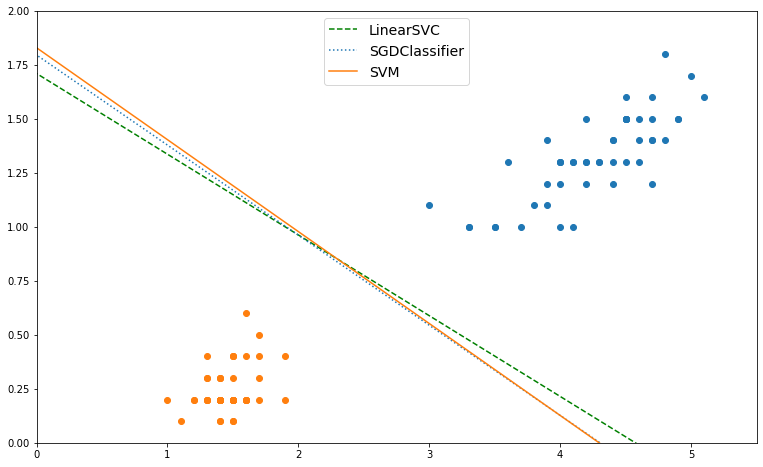

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

w_lin = -lin_clf.coef_[0, 0] / lin_clf.coef_[0,1]
b_lin = -lin_clf.intercept_[0]/lin_clf.coef_[0,1]
w_sgd = -sgd_clf.coef_[0,0]/sgd_clf.coef_[0,1]
b_sgd = -sgd_clf.intercept_[0]/sgd_clf.coef_[0,1]
w_svm = -svm_clf.coef_[0,0] / svm_clf.coef_[0,1]
b_svm = -svm_clf.intercept_[0]/svm_clf.coef_[0,1]

lin_bound = stdScalar.inverse_transform([[-10, -10*w_lin + b_lin], [10, 10*w_lin + b_lin]])
sgd_bound = stdScalar.inverse_transform([[-10,-10*w_sgd + b_sgd],[10, w_sgd*10 + b_sgd]])
svm_bound = stdScalar.inverse_transform([[-10, -10*w_svm + b_svm], [10, w_svm * 10 + b_svm]])

fig = plt.figure(figsize=(10, 6))
axs = fig.add_axes([0,0,1,1])
axs.set_ylim((0, 2))
axs.set_xlim((0, 5.5))
axs.scatter(X[y==1, 0], X[y==1, 1])
axs.scatter(X[y==0, 0], X[y==0, 1])
axs.plot(lin_bound[:,0], lin_bound[:,1], "g--", label="LinearSVC")
axs.plot(sgd_bound[:, 0], sgd_bound[:,1], ":", label="SGDClassifier")
axs.plot(svm_bound[:, 0], svm_bound[:, 1], "-",label="SVM")
axs.legend(loc="upper center", fontsize=14)

plt.show()

### 9